<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [7]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(100, 3)
(17197, 2)


In [8]:
train.head()

,id,label,tweet
0,1,1,"Had an amazing day today! The sun is shining, ..."
1,2,1,Just finished a great workout! Feeling stronge...
2,3,1,I finally achieved my goal! Hard work pays off...
3,4,1,So thankful for my friends and family! Couldn’...
4,5,1,There’s something so peaceful about a cup of c...


In [9]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [11]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
50,51,0,I can’t believe how much stress I’m under righ...
51,52,0,Why does everything have to go wrong when it f...
52,53,0,So tired of all the negativity in the world. I...
53,54,0,I’ve had a rough day. It’s just one of those d...
54,55,0,I’m so frustrated right now. Everything seems ...
55,56,0,I just can’t catch a break. Everything feels l...
56,57,0,"Some days, I just feel like giving up. This ha..."
57,58,0,How does everything always seem to go wrong? I...
58,59,0,Dealing with some really tough stuff today. Ju...
59,60,0,Nothing seems to be going right. Maybe tomorro...


In [12]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
0,1,1,"Had an amazing day today! The sun is shining, ..."
1,2,1,Just finished a great workout! Feeling stronge...
2,3,1,I finally achieved my goal! Hard work pays off...
3,4,1,So thankful for my friends and family! Couldn’...
4,5,1,There’s something so peaceful about a cup of c...
5,6,1,"Started a new book today, and I’m already hook..."
6,7,1,The weekend is here! Time to relax and recharg...
7,8,1,Exciting things are happening in my life right...
8,9,1,Every day is a new opportunity to be better th...
9,10,1,Spent the afternoon at the beach. So refreshin...


<Axes: xlabel='label'>

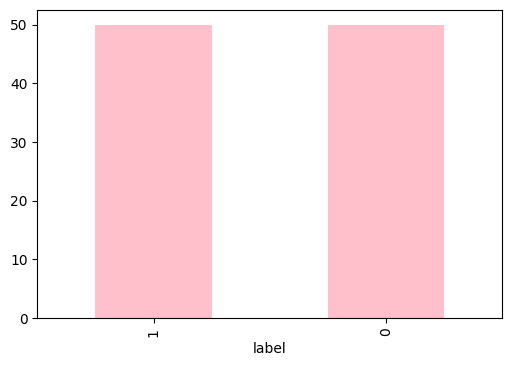

In [13]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

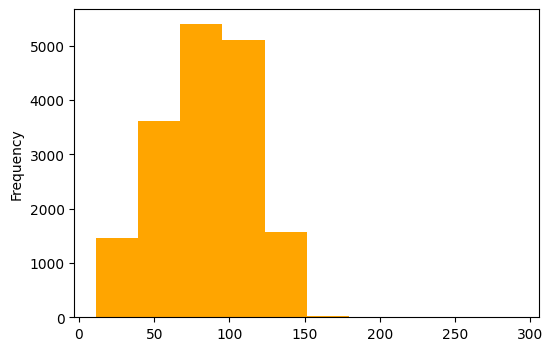

In [14]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [15]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,1,"Had an amazing day today! The sun is shining, ...",87
1,2,1,Just finished a great workout! Feeling stronge...,88
2,3,1,I finally achieved my goal! Hard work pays off...,67
3,4,1,So thankful for my friends and family! Couldn’...,91
4,5,1,There’s something so peaceful about a cup of c...,80
5,6,1,"Started a new book today, and I’m already hook...",60
6,7,1,The weekend is here! Time to relax and recharg...,64
7,8,1,Exciting things are happening in my life right...,93
8,9,1,Every day is a new opportunity to be better th...,88
9,10,1,Spent the afternoon at the beach. So refreshin...,77


In [16]:

train.groupby('label').describe()

id                                                    len         \
      count  mean       std   min    25%   50%    75%    max count   mean   
label                                                                       
0      50.0  75.5  14.57738  51.0  63.25  75.5  87.75  100.0  50.0  81.26   
1      50.0  25.5  14.57738   1.0  13.25  25.5  37.75   50.0  50.0  76.94   

                                                 
             std   min    25%   50%   75%   max  
label                                            
0       8.171154  58.0  76.00  81.5  86.0  97.0  
1      10.675950  50.0  70.75  78.0  83.0  98.0

In [17]:
#train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
#plt.title('variation of length')
#plt.xlabel('Length')
#plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

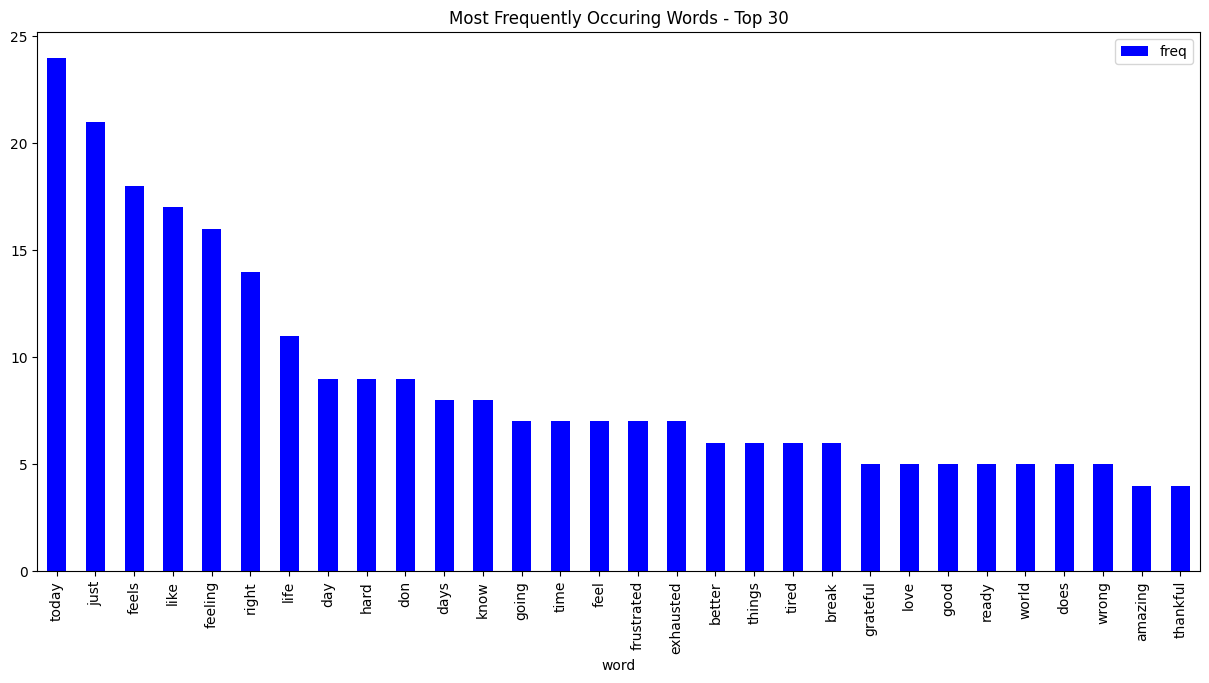

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

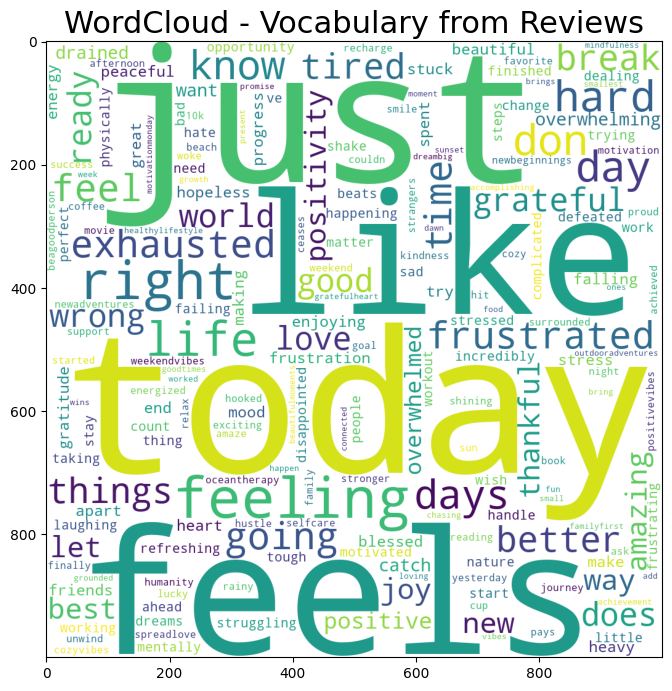

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

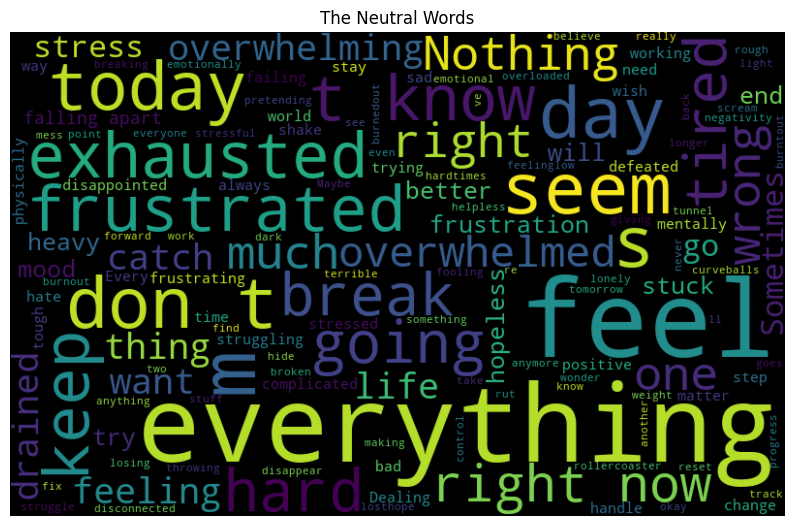

In [20]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


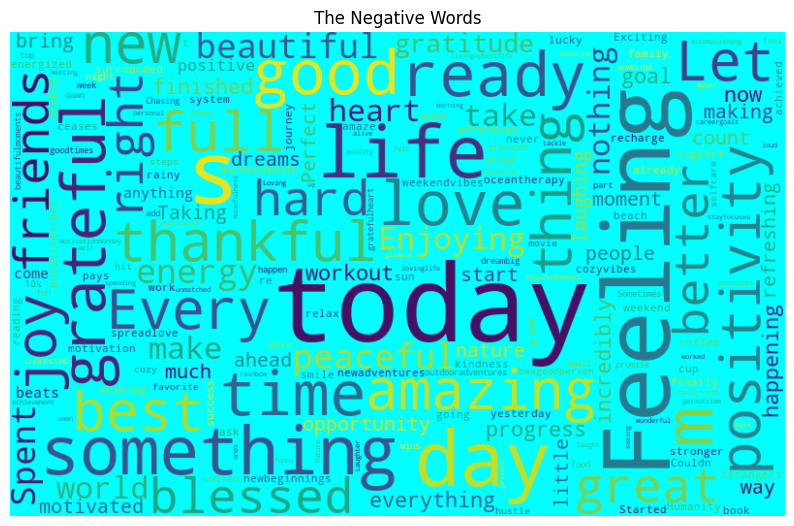

In [21]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [22]:
# collecting the hashtags
import re 
import nltk

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

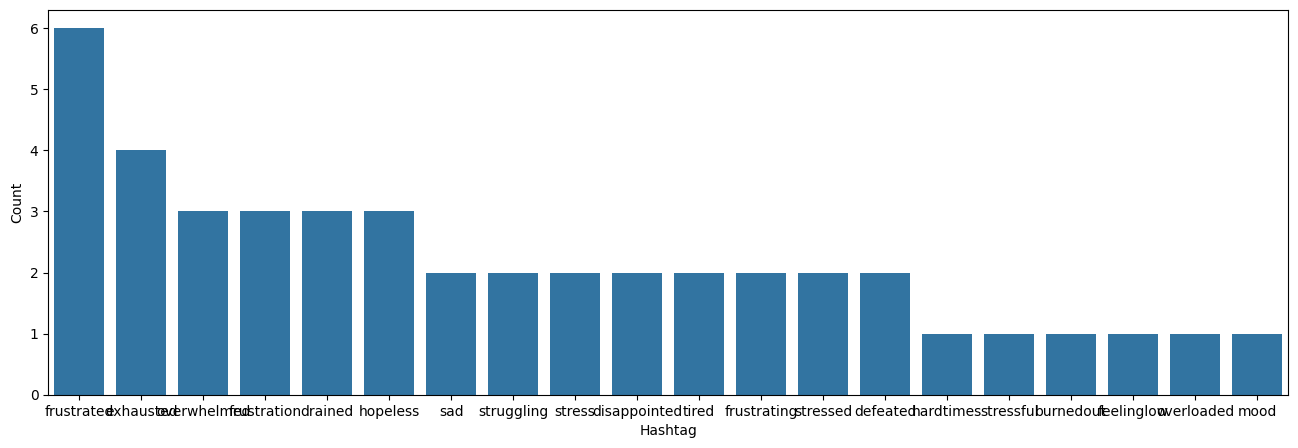

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

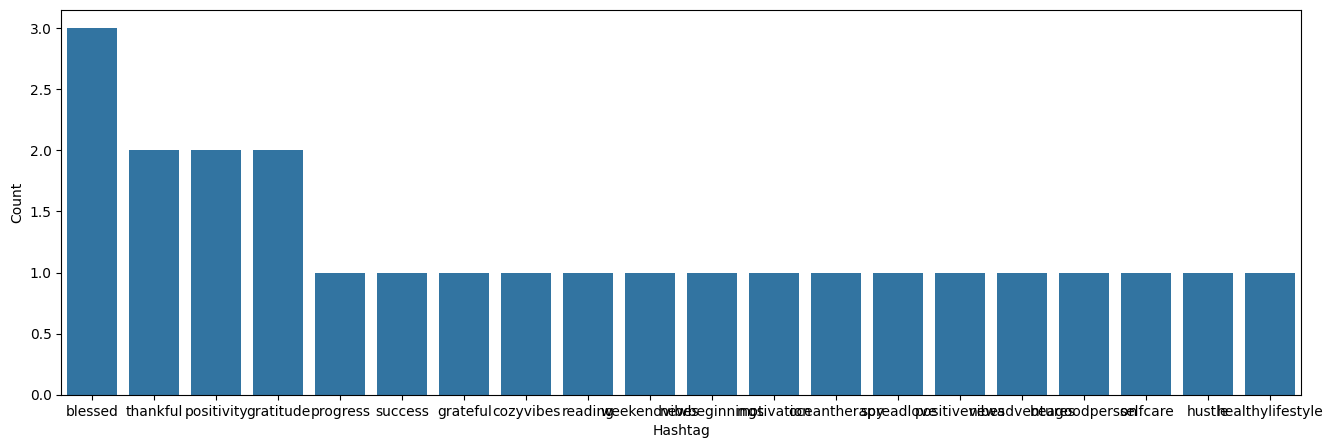

In [25]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(12237, 27980)

In [35]:
model_w2v.wv.most_similar(positive = "love")

[('💕', 0.9991268515586853),
 ('all', 0.9990875124931335),
 ('refreshing', 0.9990589022636414),
 ('😂', 0.9990555644035339),
 ('✨', 0.9990474581718445),
 ('Today', 0.9990437030792236),
 ('are', 0.9990388751029968),
 ('little', 0.9990133047103882),
 ('#thankful', 0.9990105032920837),
 ('#gratitude', 0.9990077614784241)]

In [34]:
model_w2v.wv.most_similar(positive = "today")

[('The', 0.999178409576416),
 ('today!', 0.9991244077682495),
 ('out', 0.9991033673286438),
 ('on', 0.99908846616745),
 ('😂', 0.9990854859352112),
 ('exhausted', 0.9990571141242981),
 ('Had', 0.9990414977073669),
 ('🌟', 0.9990376234054565),
 ('#exhausted', 0.9990366101264954),
 ('There’s', 0.9990355372428894)]

In [36]:
model_w2v.wv.most_similar(positive = "beautiful")

[('day', 0.9990575313568115),
 ('little', 0.9990346431732178),
 ('thing', 0.9990255832672119),
 ('good', 0.9990226626396179),
 ('✨', 0.9990198016166687),
 ('time', 0.999009907245636),
 ('😂', 0.9990075826644897),
 ('a', 0.9990024566650391),
 ('Had', 0.9989995360374451),
 ('are', 0.9989839196205139)]

In [32]:
model_w2v.wv.most_similar(negative = "hate")

[('how', -0.9983198642730713),
 ('know', -0.9984096884727478),
 ('don’t', -0.9984145164489746),
 ('full', -0.9984243512153625),
 ('Let’s', -0.9984860420227051),
 ('heart', -0.9984949827194214),
 ('the', -0.9984989762306213),
 ('bad', -0.9985563158988953),
 ('for', -0.9985754489898682),
 ('now.', -0.9985866546630859)]

In [37]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [38]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['Had', 'an', 'amazing', 'day', 'today!', 'The', 'sun', 'is', 'shining,', 'and', 'everything', 'is', 'going', 'right!', '🌞', '#blessed'], tags=['tweet_0']),
 TaggedDocument(words=['Just', 'finished', 'a', 'great', 'workout!', 'Feeling', 'stronger', 'and', 'more', 'energized', 'than', 'ever', '💪', '#progress'], tags=['tweet_1']),
 TaggedDocument(words=['I', 'finally', 'achieved', 'my', 'goal!', 'Hard', 'work', 'pays', 'off', '🙌', '#success', '#grateful'], tags=['tweet_2']),
 TaggedDocument(words=['So', 'thankful', 'for', 'my', 'friends', 'and', 'family!', 'Couldn’t', 'ask', 'for', 'a', 'better', 'support', 'system', '❤️', '#blessed'], tags=['tweet_3']),
 TaggedDocument(words=['There’s', 'something', 'so', 'peaceful', 'about', 'a', 'cup', 'of', 'coffee', 'on', 'a', 'rainy', 'day', '☕🌧', '#cozyvibes'], tags=['tweet_4']),
 TaggedDocument(words=['Started', 'a', 'new', 'book', 'today,', 'and', 'I’m', 'already', 'hooked!', '📚', '#reading'], tags=['tweet_5'])]

In [39]:
# removing unwanted patterns from the data

import re
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = list(ENGLISH_STOP_WORDS)
from nltk.stem.porter import PorterStemmer


In [40]:
# Initialize the stemmer
ps = PorterStemmer()

# Create an empty list to store processed tweets
train_corpus = []

# Iterate over the tweets in the training set
for i in range(len(train['tweet'])):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    
    # Convert to lowercase and split into words
    review = review.lower().split()
    
    # Remove stop words and apply stemming
    review = [ps.stem(word) for word in review if word not in ENGLISH_STOP_WORDS]
    
    # Join the words back into a single string and append to the corpus
    train_corpus.append(' '.join(review))

In [41]:
test_corpus = []

# Iterate over the tweets in the test set
for i in range(len(test['tweet'])):
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    
    # Convert to lowercase and split into words
    review = review.lower().split()
    
    # Remove stop words and apply stemming
    review = [ps.stem(word) for word in review if word not in ENGLISH_STOP_WORDS]
    
    # Join the words back into a single string and append to the corpus
    test_corpus.append(' '.join(review))

In [42]:
from joblib import dump, load

In [54]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 276)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

dump(cv, 'cv.joblib')
load('cv.joblib')

print(x.shape)
print(y.shape)


(100, 276)
(100,)


In [68]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 276)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 276)


In [69]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(75, 276)
(25, 276)
(75,)
(25,)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.92
f1 score : 0.9333333333333333
[[ 9  2]
 [ 0 14]]


In [71]:
import numpy as np

# Check if any negative values exist in your feature matrix (X_train, X_test)
print(np.min(x_train))  # Should be >= 0
print(np.min(x_test))   # Should be >= 0


0
0


In [81]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)


In [82]:
dump(model, 'model.joblib')
dump(cv, 'vectorizer.joblib')

loaded_model = load('model.joblib')

In [83]:
print(train['label'].value_counts())

label
1    50
0    50
Name: count, dtype: int64
